<a name="1common."></a>
## Содержание:
* [1. Описание проекта, описание данных, загрузка и импорт библиотек](#1.)
* [2. Количественный анализ](#2.)
     - [2.1. Самые популярные типы самолетов](#2.1.)
     - [2.2. Самые популярные города](#2.2.)    
* [3. Статистический анализ](#3.)
* [4. Общий вывод](#4.)

 <a name="1."><a/><br/>
    <font size ="5"><b>1. Описание проекта, описание данных, загрузка и импорт библиотек</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

**Задача**

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

**1. Был написан парсер для сбора с сайта данных о 10 крупнейших фестивалях 2018 года**

**2. Исследовательский анализ данных**

a) Посчитали, на самолётах какой модели было совершено больше всего рейсов в сентябре 2018 года. Назвали получившееся поле flights_amount

b) Посчитали количество рейсов по всем моделям самолетов Boeing и Airbus в сентябре. Назовите получившуюся переменную flights_amount 

c)Посчитали среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights

d)Установили фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили

e) Для каждой недели с 23 июля по 30 сентября 2018 года посчитали количество билетов, купленных на рейсы в Москву (номер недели week_number и количество рейсов flights_amount). Получили таблицу, в которой информация о количестве купленных за неделю билетов, отметка, проходил ли в эту неделю фестиваль, название фестиваля festival_name и номер недели week_number

Данные исследования были проведены с помощью библиотеки Python 3 beautifulsoup и доступа к базе даны посредством языка SQL


In [1]:
# таблицы
import pandas as pd

# графики
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# статистика
from scipy import stats as st
import scipy as sp
import scipy.stats

# математика
import numpy as np
import random

In [5]:
model = pd.read_csv('C:/Users/User/Desktop/Python/Практикум/model_df.csv')
model = model.drop(model.columns[0], axis='columns')
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [6]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [11]:
city = pd.read_csv('C:/Users/User/Desktop/Python/Практикум/city_df.csv')
city = city.drop(city.columns[0], axis='columns')
city['average_flights'] = city['average_flights'].astype(int)
city.head(10)

,city,average_flights
0,Абакан,4
1,Анадырь,1
2,Анапа,2
3,Архангельск,5
4,Астрахань,2
5,Барнаул,3
6,Белгород,6
7,Белоярский,2
8,Благовещенск,1
9,Братск,1


In [12]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int32
dtypes: int32(1), object(1)
memory usage: 1.3+ KB


In [13]:
city_top = city.sort_values(by = 'average_flights', ascending = False).head(10)
city_top

,city,average_flights
43,Москва,130
70,Санкт-Петербург,31
54,Новосибирск,17
33,Красноярск,12
20,Екатеринбург,11
67,Ростов-на-Дону,10
74,Сочи,10
84,Ульяновск,10
63,Пермь,10
10,Брянск,10


**Вывод:**

Пропусков нету, типы данных правильные. 
* object - строка
* int32 - целое число

 <a name="2."><a/><br/>
    <font size ="5"><b>2. Количественный анализ</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)
<a name="2.1."><a/><br/>
    <font size ="4"><b>2.1. Самые популярные типы самолетов</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Text(0, 0.5, 'Кол-во рейсов')

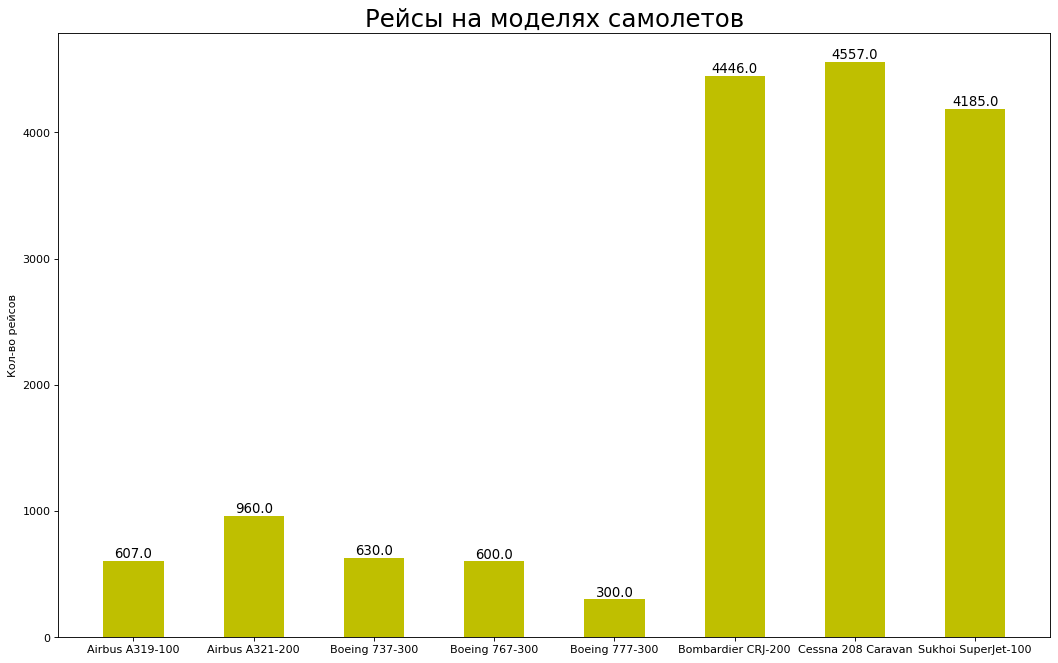

In [14]:
plt.figure(figsize=(16, 10), dpi=80)
plt.bar(model['model'], model['flights_amount'], color='y', width=.5)
for i, val in enumerate(model['flights_amount'].values):
    plt.text(i, val, float(val), horizontalalignment='center',
             verticalalignment='bottom', fontdict={'fontweight': 500, 'size': 12})
plt.title("Рейсы на моделях самолетов", fontsize=22)
plt.ylabel('Кол-во рейсов')

**Вывод:**

Популярность модели самолета, мы определяли количеством вылетов в месяц. Самые маленькие летают чаще всего. 

<a name="2.2."><a/><br/>
    <font size ="4"><b>2.2. Самые популярные города</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Text(0.5, 1.0, 'Кол-во рейсов в день по городам России')

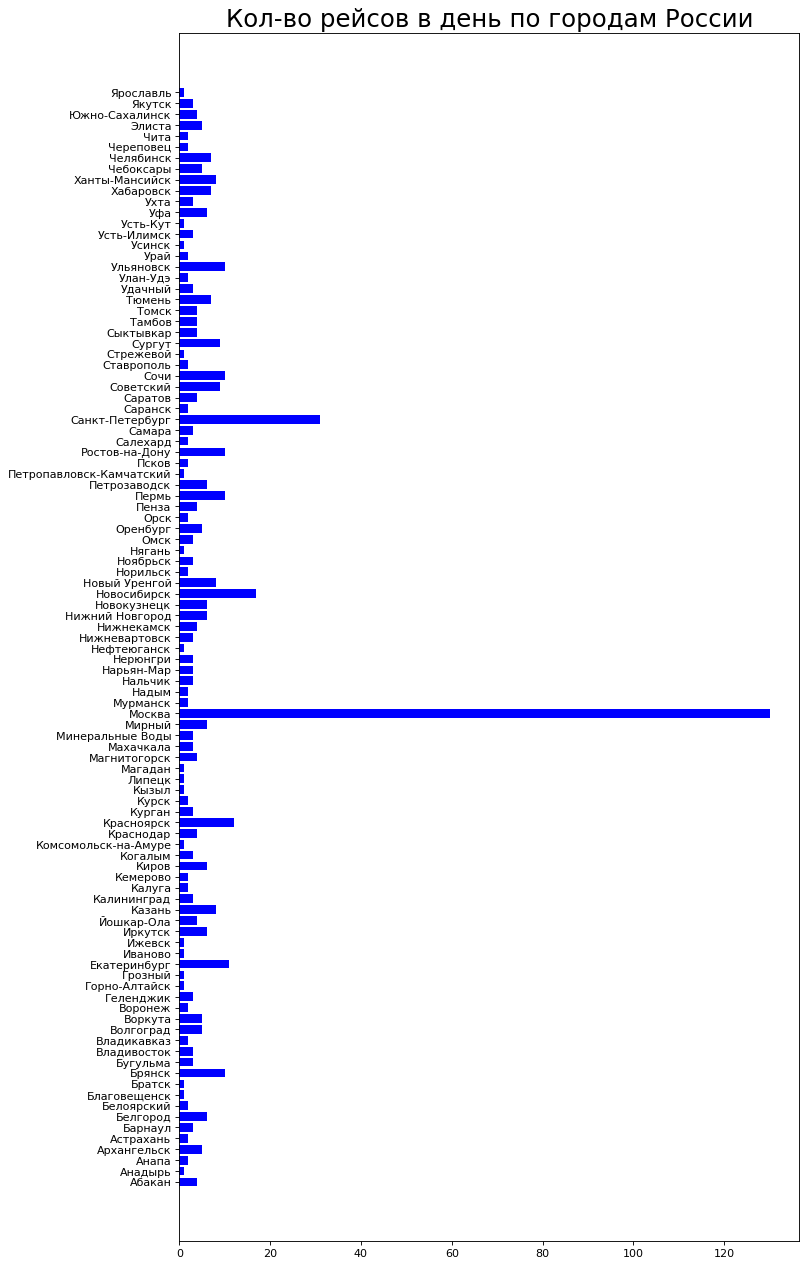

In [15]:
plt.figure(figsize=(10, 20), dpi=80)
plt.barh(city['city'], city['average_flights'], color='b')
plt.title("Кол-во рейсов в день по городам России", fontsize=22)

**Вывод:**

Лидируют две столицы и города миллионники

(-1.1094040898170818,
 1.1004478219878921,
 -1.101599547725034,
 1.1064388974356023)

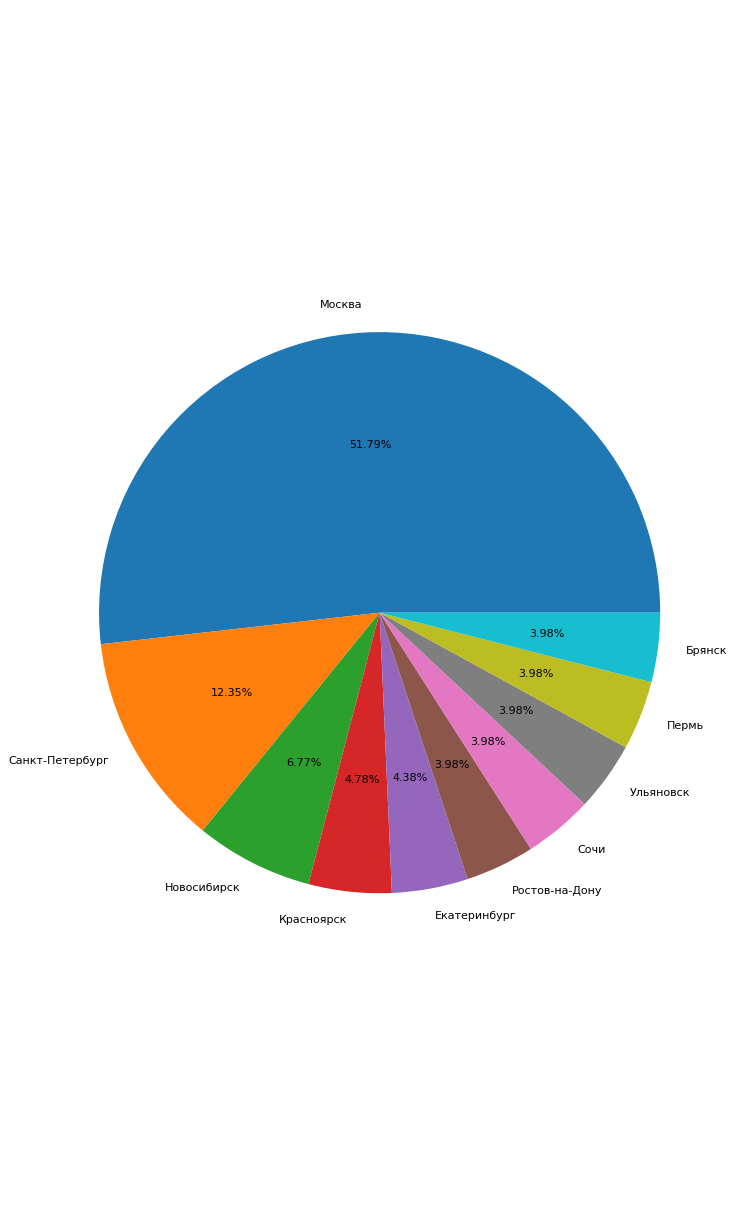

In [16]:
plt.figure(figsize=(10, 20), dpi=80)
plt.pie(city_top['average_flights'],
        labels=city_top['city'], autopct='%1.2f%%')
plt.axis("equal")

**Вывод:**

На данном графике мы можем увидеть, что Москва абсолютный лидер. Питер на втором месте

Это связанно с тем, что отсутствует прямое авиасообщение между городами России и Москву используют, как хаб(пересадочный пункт). А Питер посещают много иностранных туристов, дабы полюбоваться на архитектуру царской России.

 <a name="3."><a/><br/>
    <font size ="5"><b>3. Статистический анализ</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Проверим гипотезу о влиянии фестивалей на продажу билетов. Сформируем нулевую и альтернативную

H<sub>0</sub> - фестивали не влияют на продажу билетов

H<sub>a</sub> - фестивали влияют на продажу билетов


In [18]:
last = pd.read_csv('C:/Users/User/Desktop/Python/Практикум/df_fest.csv')
last = last.drop(last.columns[0], axis='columns')
last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [20]:
no_fest = last[last.festival_name.isnull()]
no_fest

,week_number,ticket_amount,festival_week,festival_name
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [21]:
fest = last[last.festival_name.notnull()]
fest

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
6,36,51386,36.0,Видфест


Проверим данные на нормальность тестом Шапиро-Вилка

In [22]:
# функция на тест Шапиро Вилка на нормальность генеральной совокупности
def shap(array):
    data = array
    data = np.array(data)
    data = data[np.logical_not(np.isnan(data))]
    stat, p = st.shapiro(data)
    print(stat, p)
    alpha = 0.05
    if p > alpha:
        print('Нормальное распределение')
    else:
        print('Отличное от нормального')

In [23]:
# тест Шапиро Вилка на нормальность генеральной совокупности
shap(no_fest['ticket_amount'])

0.8940209150314331 0.29630061984062195
Нормальное распределение


In [24]:
shap(fest['ticket_amount'])

0.7836964726448059 0.07614270597696304
Нормальное распределение


**Вывод:**

С 95% вероятностью мы можем утверждать, что данные взяты из ГС, имеют нормальное распределение

Проведем сравнительный анализ средних используя t-тест Стьюдента и доверительные интервалы

In [34]:
a = fest['ticket_amount']
b = no_fest['ticket_amount']

In [38]:
# функция для расчета стандартной ошибки
def stde(data, confidence):
    arr = np.array(data)
    se = scipy.stats.sem(arr)
    he = se * (1+confidence)
    return he

In [39]:
# функция для определение дов.интервалов
def dov_int(data, confidence):
    arr = np.array(data)
    n = len(arr)
    m, se = np.mean(arr), scipy.stats.sem(arr)
    h = stde(data, confidence)
    print('mean =', m.round(1), 'down =', (m-h).round(1),
          'up =', (m+h).round(1), 'stde =', h.round(1))

In [40]:
# используем гипотезу о равенстве средних двух генеральных совокупностей
alpha = 0.05
results = st.ttest_ind(a, b)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print(results.statistic, results.pvalue)

print('Доверительные интервалы')
print('Группа а')
dov_int(a, 0.95)
print('Группа b')
dov_int(b, 0.95)

Не получилось отвергнуть нулевую гипотезу
-1.8801129464020327 0.09688869045922928
Доверительные интервалы
Группа а
mean = 48662.7 down = 43691.4 up = 53633.9 stde = 4971.3
Группа b
mean = 51530.9 down = 51434.4 up = 51627.4 stde = 96.5


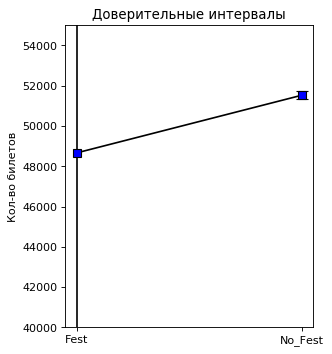

In [41]:
value = (a.mean(), b.mean())
label = ('Fest', 'No_Fest')
stde1, stde2 = stde(a, 0.95), stde(b, 0.95)
y_pos = np.arange(len(label))
plt.figure(figsize=(4, 5), dpi=80)
plt.errorbar(y_pos, value, yerr=(2*stde1, 2*stde2), color="black", capsize=5,
             marker="s", markersize=7, mfc="blue", mec="black")
plt.ylim([40000, 55000])
plt.xticks(y_pos, label)
plt.ylabel('Кол-во билетов')
plt.title('Доверительные интервалы')
plt.show()

**Вывод:**

Мы не можем утверждать, что фестивали в Москве имеют влияние на кол-во проданных билетов. В t-тесте Стьюдента мы не обнаружили значимых различий и график дов. интервалов показывает, что распределения средних попадают в один интервал. 

Склоняемся к мнению, что фестивали в Москве не имеют значимого влияния на продажу билетов. 

 <a name="4."><a/><br/>
    <font size ="5"><b>4. Общий вывод</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Проведя анализ, мы выяснили:

1. Москва абсолютный лидер по количеству рейсов. 130 рейсов в день, для сравнения в Красноярске 12 рейсов. 2-е место у Санкт-Петербурга - 31 рейс в день. Это связанно с тем, что отсутствует прямое авиасообщение между городами России и Москву используют, как ХАБ (пересадочный пункт). А Питер посещают много иностранных туристов, дабы полюбоваться на архитектуру царской России.

2. В Москве много факторов влияет на продажу билетов, и фестивали не имеют значимости. Во-первых Москва, это центр событийного туризма и фестивали могут затеряться на общем фоне. Во-вторых, чтобы добраться из Самары до Новосибирска, вам нужно сначала прилететь в Москву. Это специфика российского авиа-бизнеса. 

Это, если данные, добытые нами, имеют связь с реальностью


Если проект чисто гипотетический, то можно сделать вывод, что в Москву летят, потому что это столица с населением как в 20 крупнейших городах России. И фестивали в Москве не влияют на продажи, потому что событий слишком много и можно оценивать только совокупность влияния всех факторов, а не конкретно фестивалей
